# Game and Argumentation: Time for a Family Reunion

This notebook aims to demonstrate the paper "Game and Argumentation: Time for a Family Reunion" accepted by XLoKR 2023. 

**Import Functions** <br>
Let's import functions for later usage

In [1]:
from functions import *

## Section1: All Start from a Plain Graph

Imagine that we have a graph $G = (V, E)$ and here are the edges

In [2]:
%%file files/plain_graph.dlv

edge(a,b).
edge(a,c).
edge(k,l).
edge(c,d).
edge(c,e).
edge(l,e).
edge(l,m).
edge(d,e).
edge(e,d).
edge(e,m).
edge(m,e).
edge(d,f).
edge(d,g).
edge(g,d).
edge(e,h).
edge(m,n).
edge(n,m).

Overwriting files/plain_graph.dlv


Suppose the predicate $edge(X,Y)$ means a directed edge from $X$ to $Y$, we can easily get the graph below

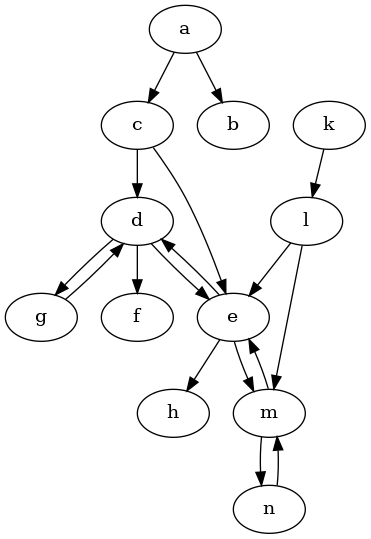

In [3]:
# visualize_file (input_file_address, predicate_name, output_filename)
visualize_file("files/plain_graph.dlv","edge","plain_graph") # adjust the predicate name accordingly
Image("output/plain_graph.png")

## Section2: Move Graph

### 2.1 Get Move Graph

Okie, let's introduce the move graph, with a simple rule $move(X,Y):- \, edge(X,Y)$, we can get the move graph

In [4]:
%%file files/plain_to_move.dlv

move(X,Y):- edge(X,Y).

Overwriting files/plain_to_move.dlv


In [5]:
cmd = 'dlv files/plain_graph.dlv files/plain_to_move.dlv -filter="move"'

In [6]:
run_command(cmd)

'DLV [build BEN/Dec 17 2012   gcc 4.6.1]\n\n{move(a,b), move(a,c), move(c,d), move(c,e), move(k,l), move(l,e), move(l,m), move(d,e), move(d,f), move(d,g), move(e,d), move(e,m), move(e,h), move(m,e), move(m,n), move(g,d), move(n,m)}\n'

In [7]:
visualize_file(run_command(cmd),"move","move_graph")

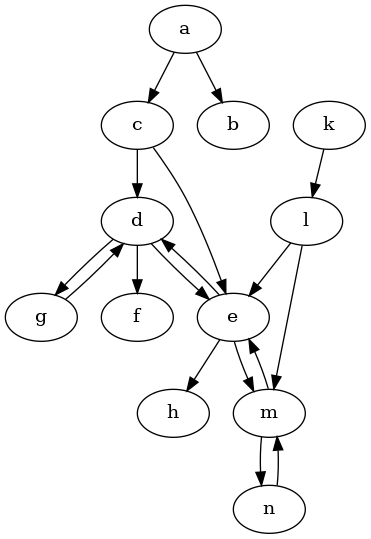

In [8]:
Image("output/move_graph.png")

### 2.2 Solve the Game

Based on the <br>

$win(X) ← move(X, Y ), ¬ win(Y ).$ <br>
$lost(X) ←  ¬ win(X).$ <br>

we can solve this move graph

In [9]:
%%file files/solve_game.dlv

% Positions
pos(X) :- move(X,_).
pos(X) :- move(_,X).

% Win_Move
win(X) :- move(X,Y),not win(Y).
lost(X) :- pos(X), not win(X).
drawn(X) :- pos(X), not win(X), not lost(X).

Overwriting files/solve_game.dlv


In [10]:
cmd = 'dlv files/plain_graph.dlv files/plain_to_move.dlv files/solve_game.dlv -wf'

In [11]:
run_command(cmd)

'DLV [build BEN/Dec 17 2012   gcc 4.6.1]\n\nTrue: {edge(a,b), edge(a,c), edge(c,d), edge(c,e), edge(k,l), edge(l,e), edge(l,m), edge(d,e), edge(d,f), edge(d,g), edge(e,d), edge(e,m), edge(e,h), edge(m,e), edge(m,n), edge(g,d), edge(n,m), move(a,b), move(a,c), move(c,d), move(c,e), move(k,l), move(l,e), move(l,m), move(d,e), move(d,f), move(d,g), move(e,d), move(e,m), move(e,h), move(m,e), move(m,n), move(g,d), move(n,m), pos(a), pos(b), pos(c), pos(k), pos(l), pos(d), pos(e), pos(m), pos(f), pos(g), pos(h), pos(n), lost(b), lost(f), lost(h), win(a), win(d), win(e), lost(c), lost(g)}\nUndefined: {win(l), win(k), win(m), win(n), lost(k), lost(l), lost(m), lost(n), drawn(k), drawn(l), drawn(m), drawn(n)}\n'

In [12]:
nodes_status = get_nodes_status(run_command(cmd),node_types=["win","lost","drawn"])

In [13]:
nodes_status

{'win': ['a', 'd', 'e'],
 'lost': ['b', 'f', 'h', 'c', 'g'],
 'drawn': ['k', 'l', 'm', 'n']}

### 2.3 Color the Move Graph

**Color the Nodes**

Suppose we aim to assign colors to the move graph according to the node status. Nodes labeled as $win$ will be colored green, those with a $lost$ status will be colored red, and if they're identified as drawn, they'll be colored yellow.

In [14]:
node_color_schema = {'win': 'green', 'lost': 'red', 'drawn': 'yellow'}

In [15]:
color_nodes("output/move_graph.dot",nodes_status,node_color_schema)

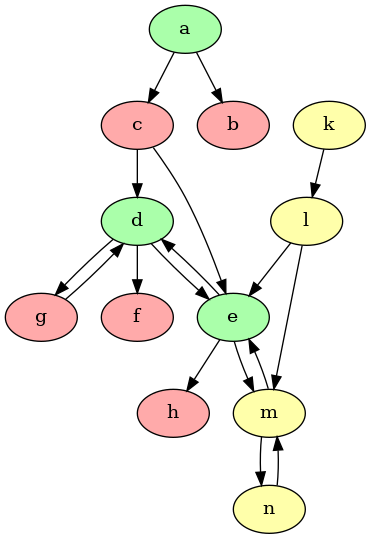

In [16]:
Image("output/move_graph_node_colored.png")

**Color the Edges**

In [17]:
edge_color_schema = {
        ('green', 'green'): 'gray',
        ('green', 'yellow'): 'gray',
        ('yellow', 'green'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('green', 'red'): 'green',
        ('red', 'green'): 'red'
    }

In [18]:
color_edges("output/move_graph_node_colored.dot",edge_color_schema)

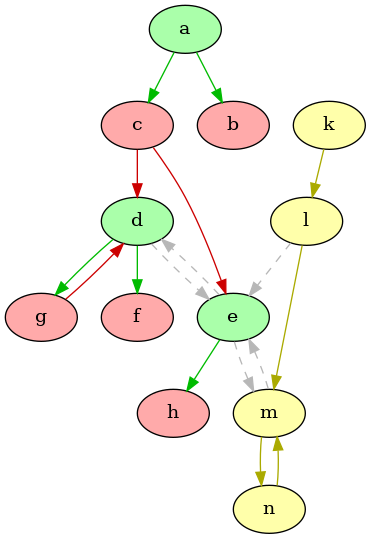

In [19]:
Image("output/move_graph_node_colored_edge_colored.png")

## Section 3: Argumentation Graph

### 3.1 Generate the Argumentation Graph

So what about the attack graph? we can use one rule $attacks(Y, X):- \, edge(X,Y)$ to turn the plain graph into an argumentation graph

In [20]:
%%file files/plain_to_argu.dlv

attacks(Y,X):- edge(X,Y).

Overwriting files/plain_to_argu.dlv


In [21]:
cmd = 'dlv files/plain_graph.dlv files/plain_to_argu.dlv -filter="attacks"'

In [22]:
run_command(cmd)

'DLV [build BEN/Dec 17 2012   gcc 4.6.1]\n\n{attacks(b,a), attacks(c,a), attacks(l,k), attacks(d,c), attacks(d,e), attacks(d,g), attacks(e,c), attacks(e,l), attacks(e,d), attacks(e,m), attacks(m,l), attacks(m,e), attacks(m,n), attacks(f,d), attacks(g,d), attacks(h,e), attacks(n,m)}\n'

In [23]:
visualize_file(run_command(cmd),"attacks","argu_graph", argu=True)

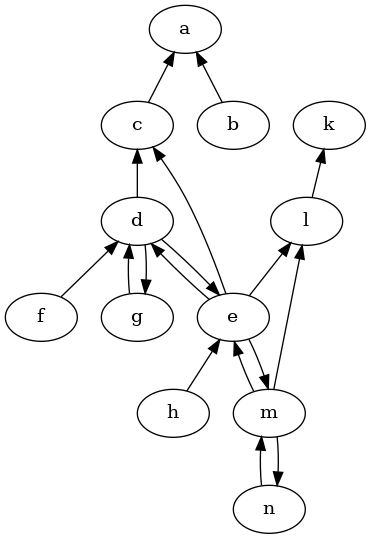

In [24]:
Image("output/argu_graph.png")

### 3.2 Reason on the Argumentation Graph

Based on the <br>

$defeated(X) ← attacks(Y, X), ¬ defeated(Y).$ <br>
$undefeated(X) ←  ¬ defeated(X).$ <br>

we can solve this move graph

In [25]:
%%file files/reason_argumentation.dlv

% Positions
pos(X) :- attacks(X,_).
pos(X) :- attacks(_,X).

% Win_Move
defeated(X) :- attacks(X,Y),not defeated(Y).
undefeated(X) :- pos(X), not defeated(X).
drawn(X) :- pos(X), not defeated(X), not undefeated(X).

Overwriting files/reason_argumentation.dlv


In [26]:
cmd = 'dlv files/plain_graph.dlv files/plain_to_argu.dlv files/reason_argumentation.dlv -wf'

In [27]:
run_command(cmd)

'DLV [build BEN/Dec 17 2012   gcc 4.6.1]\n\nTrue: {edge(a,b), edge(a,c), edge(c,d), edge(c,e), edge(k,l), edge(l,e), edge(l,m), edge(d,e), edge(d,f), edge(d,g), edge(e,d), edge(e,m), edge(e,h), edge(m,e), edge(m,n), edge(g,d), edge(n,m), attacks(b,a), attacks(c,a), attacks(l,k), attacks(d,c), attacks(d,e), attacks(d,g), attacks(e,c), attacks(e,l), attacks(e,d), attacks(e,m), attacks(m,l), attacks(m,e), attacks(m,n), attacks(f,d), attacks(g,d), attacks(h,e), attacks(n,m), pos(a), pos(b), pos(c), pos(k), pos(l), pos(d), pos(e), pos(m), pos(f), pos(g), pos(h), pos(n), undefeated(a), undefeated(k), defeated(b), defeated(c), defeated(l)}\nUndefined: {defeated(d), defeated(e), defeated(g), defeated(m), defeated(n), defeated(f), defeated(h), undefeated(d), undefeated(e), undefeated(m), undefeated(f), undefeated(g), undefeated(h), undefeated(n), drawn(d), drawn(e), drawn(m), drawn(f), drawn(g), drawn(h), drawn(n)}\n'

In [28]:
nodes_status_argu = get_nodes_status(run_command(cmd), node_types=["defeated","undefeated","drawn"])

In [29]:
nodes_status_argu

{'defeated': ['a', 'k', 'b', 'c', 'l'],
 'undefeated': ['a', 'k'],
 'drawn': ['d', 'e', 'm', 'f', 'g', 'h', 'n']}

### Color the Graph

In [30]:
node_color_schema_argu = {'defeated': 'orange', 'undefeated': 'blue', 'drawn': 'yellow'}

In [31]:
color_nodes("output/argu_graph.dot",nodes_status_argu,node_color_schema_argu)

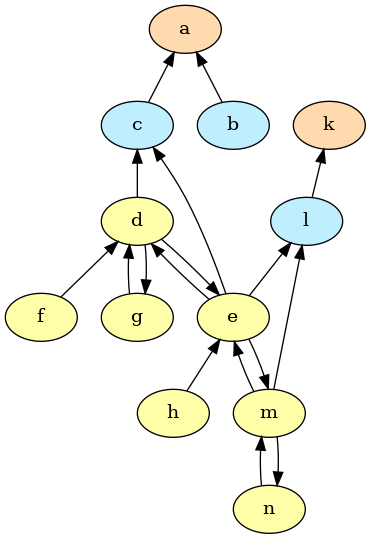

In [32]:
Image("output/argu_graph_node_colored.png")

In [33]:
edge_color_schema_argu = {
        ('blue', 'blue'): 'gray',
        ('blue', 'yellow'): 'gray',
        ('yellow', 'blue'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('blue', 'orange'): 'blue',
        ('orange', 'blue'): 'orange'
    }

In [34]:
color_edges("output/argu_graph_node_colored.dot",edge_color_schema_argu)

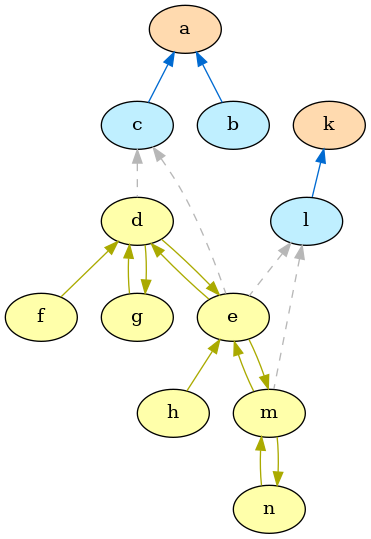

In [35]:
Image("output/argu_graph_node_colored_edge_colored.png")